# DS2500 Lesson11

Feb 17, 2023

Content:
- types of data
- averages
    - mean
    - median
    - mode
- "measure of dispersion"
    - i.e. "How close is my data to its mean?"
    - variance
    - standard deviation
- "how do two features vary together?"
    - covariance
    - correlation

Admin:
- hw2 due tonight
- project
    - [proposal](https://course.ccs.neu.edu/ds2500/proj_rubric.html#project-proposal) due M Feb 27
    - [team formation process](https://course.ccs.neu.edu/ds2500/proj_team.html#team-formation)
- I will almost certainly do a zoom video on the last bit of this lesson (correlation)



## Types of Data

|                | **Type**     | **Ordered** | **Meaningful Distances** | **State between any others** | **Example**                                 |
|----------------|--------------|-------------|--------------------------|------------------------------|---------------------------------------------|
| **Nominal**   | Qualitative  | No          | No                       | No                           | rainy, sunny, windy, cloudy                         |
| **Ordinal**    | Qualitative  | Yes         | No                       | No                           | rainy, damp, dry                            |
| **Discrete**   | Quantitative | Yes         | Yes                      | No                           | inches of rainfall (rounded to nearest int) |
| **Continuous** | Quantitative | Yes         | Yes                      | Yes                          | inches of rainfall                          |

## Ordered Data
Any set of observations has some natural ordering.

## Meaningful Distances
We can compute (and interpret) difference between any pair of outcomes.

## State between any others
Between every pair of outcomes there is another outcome

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20211019230043/UntitledDiagram13.jpg" width=400>

## Quick-Question
What type of data are zipcodes?


## Sample Mean


In [1]:
import pandas as pd

df_grades = pd.DataFrame({'quiz1': [6, 7, 8, 8, 6, 7, 7, 6, 8], 
                          'quiz2': [6, 5, 6, 10, 9, 5, 6, 10, 6]})
df_grades


,quiz1,quiz2
0,6,6
1,7,5
2,8,6
3,8,10
4,6,9
5,7,5
6,7,6
7,6,10
8,8,6


**Sample Mean** of a population is the arithmetic average:
$$ \bar{x} = \frac{1}{N} \sum_i x_i $$
(add all entries together and divide by number of entries)


In [2]:
df_grades.mean()


quiz1    7.0
quiz2    7.0
dtype: float64

### Plotting code
- Feel free to ignore it today (it isn't our focus today)
    - If you see something you'd like to re-use, you can always go back and peek


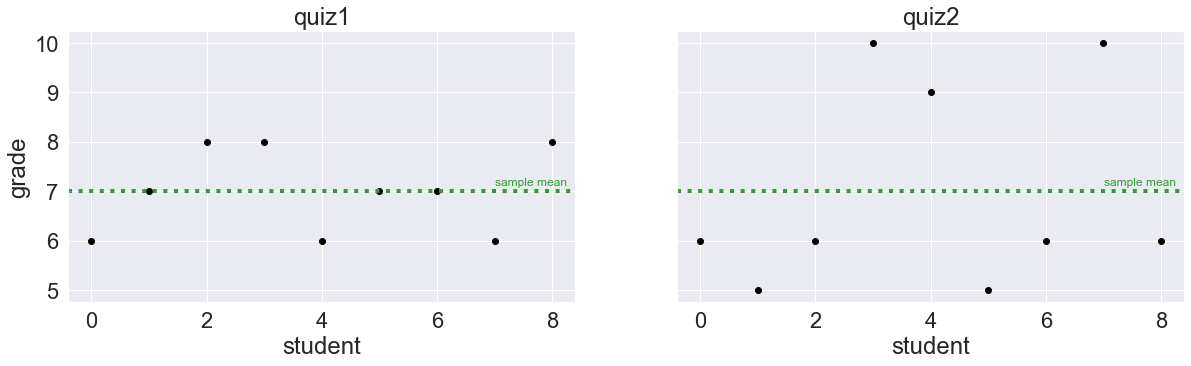

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)

f, axes = plt.subplots(1, 2, sharey=True)
for ax, label in zip(axes, df_grades.columns):
    ax.plot(df_grades[label], 'o', color='black')
    ax.set_title(label)
    ax.set_xlabel('student')
    ax.grid(True)
    ax.axhline(df_grades[label].mean(), color='tab:green', ls=':', lw=4)
    ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].mean()+.125), text='sample mean',
               ha='right', fontsize=12, color='tab:green')
axes[0].set_ylabel('grade')
f.set_size_inches(20, 5)


## Sample Median


**Sample Median** is the "halfway" point of a set of sorted values:
- half of the remaining data is greater than median
- half of the remaining data is less than  median

If a set of numbers has an even number of points then median is mean of middle most two points.


In [4]:
df_grades[label].shape[0]


9

In [5]:
df_grades.median()


quiz1    7.0
quiz2    6.0
dtype: float64

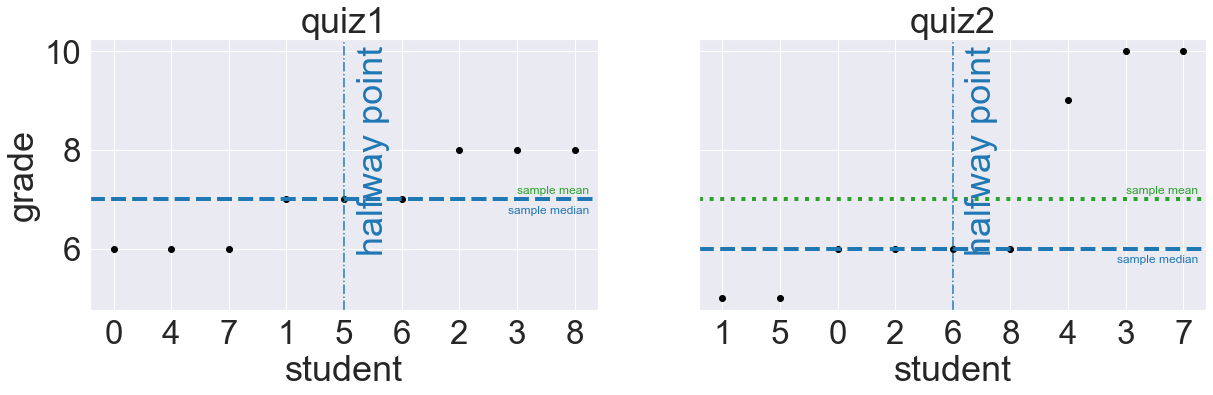

In [6]:
import matplotlib.pyplot as plt

sns.set(font_scale=3)

f, axes = plt.subplots(1, 2, sharey=True)
for ax, label in zip(axes, df_grades.columns):
    ax.plot(df_grades[label].sort_values().values, 'o', color='black')
    ax.set_xticks(range(0, len(df_grades)))
    ax.set_xticklabels(df_grades[label].sort_values().index)
    ax.set_title(label)
    ax.set_xlabel('student')
    ax.grid(True)
    ax.axhline(df_grades[label].mean(), color='tab:green', ls=':', lw=4)
    ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].mean()+.125), text='sample mean',
               ha='right', fontsize=12, color='tab:green')
    
    ax.axhline(df_grades[label].median(), color='tab:blue', ls='--', lw=4)
    ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].median()-.125), text='sample median',
               ha='right', fontsize=12, color='tab:blue', va='top')
    
    ax.annotate(xy = (.525, .975), color='tab:blue', xycoords='axes fraction', rotation=90, 
               text = 'halfway point', va='top', ha='left')
    
    ax.axvline((len(df_grades)-1)/2, ls='-.', color='tab:blue')
    
axes[0].set_ylabel('grade')
f.set_size_inches(20, 5)


### Median is an attractive average when 
- data contains outliers
    - **outlier:** a value which is atypically far from the average
- data is ordinal
    - we can't compute mean of ordinal data
    


## Sample Mode


In [7]:
df_grades


,quiz1,quiz2
0,6,6
1,7,5
2,8,6
3,8,10
4,6,9
5,7,5
6,7,6
7,6,10
8,8,6


**Sample Mode** is the most common value in a dataset.

Pandas has a mode function, but I think its more informative to call `Series.value_counts()` which yields a series of how often each value occurs in a series:


In [8]:
# all three df_grades are equally likely - the mode is not unique
df_grades['quiz1'].value_counts()


6    3
7    3
8    3
Name: quiz1, dtype: int64

In [9]:
# mode is unique
df_grades['quiz2'].value_counts()


6     4
5     2
10    2
9     1
Name: quiz2, dtype: int64

### Mode is an attractive average when:
- data is not numerical (e.g. categorical)
- being "close" isn't helpful
    - lottery example
- data is nominal


### In Class Assignment A
For each column in the dataset below:
1. identify
1. compute
1. justify 

which of the 

- mean
- median
- mode 

is the best measure of the average of the data.


In [10]:
import pandas as pd

df = pd.DataFrame({'x': [-10, 10, -10, 10, -10, 10],
                   'y': [.1, 1, 10, 100, 1000, 10000],
                   'zip code': [2215, 2215, 2215, 2215, 2215, 90210]})

df



,x,y,zip code
0,-10,0.1,2215
1,10,1.0,2215
2,-10,10.0,2215
3,10,100.0,2215
4,-10,1000.0,2215
5,10,10000.0,90210


In [11]:
df.median(axis=0)

x              0.0
y             55.0
zip code    2215.0
dtype: float64

In [12]:
df.mean(axis=0)

x               0.000000
y            1851.850000
zip code    16880.833333
dtype: float64

In [13]:
df.mode(axis=0)

,x,y,zip code
0,-10.0,0.1,2215.0
1,10.0,1.0,NaN
2,NaN,10.0,NaN
3,NaN,100.0,NaN
4,NaN,1000.0,NaN
5,NaN,10000.0,NaN



## response
Mode would be the best measure of the average of the x data and zipcode because there is one outlier (90210) in the nominal data, and it shows more information about x and the zipcode than using mean or medium. 

Median would be the best for y data and zipcode because there is a huge outlier (10000) in the data.


## How dispersed is the data?


In [14]:
df_grades


,quiz1,quiz2
0,6,6
1,7,5
2,8,6
3,8,10
4,6,9
5,7,5
6,7,6
7,6,10
8,8,6


## Observations vs Ground Truth

    Fishing in a new pond, you catch fish which are 3 lbs and another which is 5 lbs.  
    What can (and can't) you say about the average fish weight in the pond?


- **Observed** data points can be collected from an experiment.
- The **Ground Truth** describes information which is absolutely true.  
    - we rarely know ground truth information about distributions
        - instead ... we estimate them
        
       
### Language (and notation) to distinguish between observations and ground truth:

| **Observed**                             | **Ground Truth**            |
|------------------------------------------|-----------------------------|
| Sample Mean $\bar{x}$                    | Expected Value $E[x], \mu$       |
| Sample Standard Deviation $\hat{\sigma}$ | Standard Deviation $\sigma$ |
| Sample Variance $\hat{\sigma^2}$         | Variance $\sigma^2$         |

(In DS practice, because almost all our data is observed, we rarely say "Sample Mean" and usually just say "Mean", and usually when folks just say "Standard Deviation" or "Variance" they mean the "Sample Standard Deviation" and "Sample Variance")
    


### Variance
**Variance** is the average squared distance from the mean. 
$$ \sigma^2 = \frac{1}{N} \sum_i (x_i-\mu)^2 $$
where $\mu$ is the expected value of the distribution that $x_i$ came from.

Rarely do we know the distribution (or its mean $\mu$).  The best we can do is estimate this value as the **Sample Variance**:
$$ \hat{\sigma}^2 = \frac{1}{N-1} \sum_i (x_i-\bar{x})^2 $$
where $\bar{x}$ is the sample mean.  

**Note the $\frac{1}{N-1}$ term in Sample Variance (Bessel's Correction) differs from the $\frac{1}{N}$ term in Variance above.**


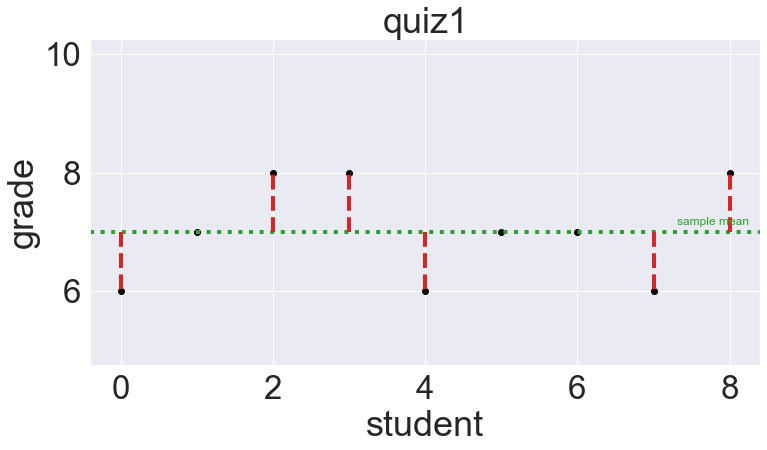

In [15]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
label='quiz1'
ax.plot(df_grades[label], 'o', color='black')
ax.set_title(label)
ax.set_xlabel('student')
ax.grid(True)
ax.axhline(df_grades[label].mean(), color='tab:green', ls=':', lw=4)
ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].mean()+.125), text='sample mean',
           ha='right', fontsize=12, color='tab:green')
ax.set_ylim([4.75, 10.25])

for idx, el in enumerate(df_grades[label]):
    ax.plot([idx, idx], [df_grades[label].mean(), el], lw=4, ls='--', color='tab:red')

ax.set_ylabel('grade')
f.set_size_inches(12, 6)


In Quiz 1 we see that the sample mean is 7.  So that:
$$ \hat{\sigma}^2 =   = \frac{1}{N-1} \sum_i (x_i-\bar{x})^2 = \frac{1}{9-1} \cdot((-1)^2 + 0^2 + 1^2 + 1^2 + (-1)^2 + 0^2 + 0^2 + (-1)^2 + 1^2) = \frac{6}{8} = .75$$


In [16]:
df_grades['quiz1'].var()


0.75

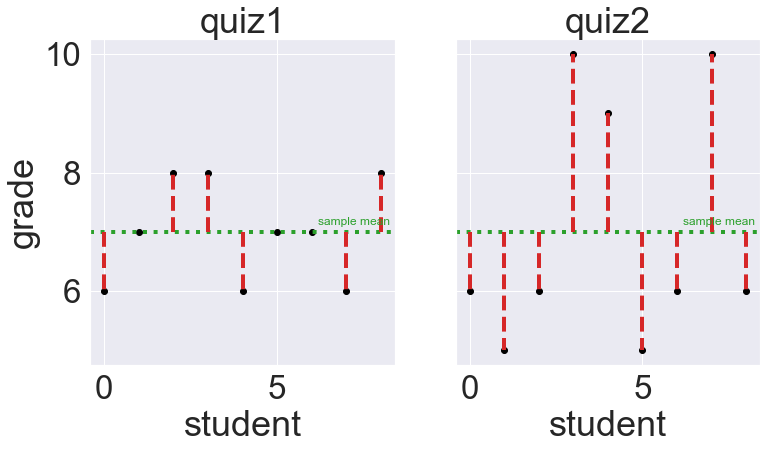

In [17]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(1, 2, sharey=True)
for ax, label in zip(axes, df_grades.columns):
    ax.plot(df_grades[label], 'o', color='black')
    ax.set_title(label)
    ax.set_xlabel('student')
    ax.grid(True)
    ax.axhline(df_grades[label].mean(), color='tab:green', ls=':', lw=4)
    ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].mean()+.125), text='sample mean',
               ha='right', fontsize=12, color='tab:green')
    ax.set_ylim([4.75, 10.25])

    for idx, el in enumerate(df_grades[label]):
        ax.plot([idx, idx], [df_grades[label].mean(), el], lw=4, ls='--', color='tab:red')

axes[0].set_ylabel('grade')
f.set_size_inches(12, 6)


In Quiz 2 we see that the sample mean is the same, but the distances from the mean are bigger:
$$ \hat{\sigma}^2 = \frac{1}{9-1} \cdot(1^2 + 2^2 + 1^2 + 3^2 + 2^2 + 2^2 + 1^2 + 3^2 + 1^2) = \frac{34}{8} = 4.25$$


In [18]:
df_grades.var()


quiz1    0.75
quiz2    4.25
dtype: float64

### Quick Question:

What does the cell above tell us about quiz1 and quiz2?  (See if you can use language which is easily understood by folks without much math background)


### Standard deviation
Standard deviation is just the square root of the variance:

$$ \hat{\sigma} = \sqrt{\hat{\sigma}^2} = \sqrt{\frac{1}{N-1} \sum_i (x_i-\bar{x})^2} $$


## In Class Assignment B

    set A: 4, 6, 8, 6, 2, 10

    set B: -100, 100, -100, 100

1. Using your intuition and the definitions of sample mean and sample variance, tell which set:
- has the largest sample mean
- has the largest sample variance

2. Then, with pencil and paper, compute the sample mean and sample variance of each.

3. Finally, use pandas to compute the sample mean and variance of each set to validate your solution


Set A has the largest sample mean.

Set B has the largest sample variance


In [23]:
import pandas as pd

setA = [4,6,8,6,2,10]
pd.Series(setA).var() 


8.0

In [25]:
pd.Series(setA).mean()

6.0

In [24]:
setB = [-100,100,-100,100]
pd.Series(setB).var()

13333.333333333334

In [26]:
pd.Series(setB).mean()

0.0

### Are averages (mean, median, mode) and dispersion (standard deviation and variance) sufficient to describe data?

There's one more common thing people want to measure ...

### Quick Question:
Whats the difference between the real (blue) and fake (orange) penguins below?

- hint: for both `body_mass_g` and `flipper_length_mm`:
    - variance among blue dots is about equivilent to orange dots


<img src="https://i.ibb.co/Hgnp2gb/real-fake-penguin.png" alt="Drawing" style="width: 800px;"/>



    
<img src="https://i.ibb.co/y5zn21T/mass-flipper-scatter1.png" alt="Drawing" style="width: 800px;"/>



### Heavier penguins have longer flippers

... and yet mean and variance, by themselves, don't characterize this behavior.


### Punchline: We need a way of encapsulating how `body_mass_g` and `flipper_length_mm` vary together.


### Co-variance & correlation: Qualitatively
(How two values vary together)

The behavior between any two values x and y can be summarized in one of the three ways:
1. as x gets larger y typically gets larger too
    - ex: 
        - `x=temp on some day`
        - `y=number of people on the beach on the same day`
    - covariance & correlation is positive
2. as x gets larger y typically doesn't get larger or smaller
    - ex: 
        - `x=individual's favorite number`
        - `y=number of hot dogs that individual has eaten in their lifetime`
    - covariance & correlation is zero
3. as x gets larger, y typically gets smaller
    - ex: 
        - `x=average speed of driver on 10 mile commute`
        - `y=average commute time of driver on 10 mile commute`
    - covariance & correlation are negative
    
#### Mea Culpa
There is a difference between covariance and correlation ... for now let them share a definition.  We'll go back and distinguish once this definition is solidified.


### Covariance & Correlation: Gotcha
Covariance & Correlation are only defined between two values when the observations are somehow **linked**:
1. on the same **day**, we observe temp & beach population
1. on the same **individual**, we observe favortie number & hot dogs eaten
1. on the same **driver**, we observe speed and commute time

If we don't observe the data in pairs, correlation / covariance is not defined:
- `x=an individual's favorite number`
- `y=the temperature on a given day`

`x` is observed per individual while `y` is observed per day ... there isn't a way to "pair" every x with a y!


In [27]:
df_penguin = sns.load_dataset('penguins')
df_penguin.cov()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.807054,-2.534234,50.375765,2605.591912
bill_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


## Computing Co-variance ("by hand")

**Goal**: 

compute the covariance of x and y below:


In [28]:
import pandas as pd

df_car = pd.DataFrame({'car weight (x)': [-2, -1, 0, 1, 2],
                       'mpg (y)': [2, 1, 0, -1, -2]},
                      index=['car0', 'car1', 'car2', 'car3', 'car4'])
df_car


,car weight (x),mpg (y)
car0,-2,2
car1,-1,1
car2,0,0
car3,1,-1
car4,2,-2


**Sample covariance:**
$$ \texttt{cov}(x, y) = \frac{1}{N-1} \sum_i (x_i - \bar{x})(y_i - \bar{y})$$


**Compute:**

|      | x | y | $$ x_i - \bar{x}$$ | $$y - \bar{y}$$ | $$ (x_i - \bar{x})(y - \bar{y})$$ |
|-----:|---------------:|--------:|--------------------|-----------------|-----------------------------------|
| car0 |              -2 |       2 | -2                 | 2               | -4                                |
| car1 |              -1 |       1 | -1                 | 1               | -1                                |
| car2 |              0 |       0 | 0                  | 0               | 0                                 |
| car3 |              1 |       -1 | 1                  | -1              | -1                                |
| car4 |              2 |       -2 | 2                  | -2              | -4                                |

### Quick Question
- Under what conditions is the last column positive? ... either:
    - x is above its average and y is above its average
    - x is below its average and y is below its average
    
#### punchline:
The algebraic insight immediately above is closely aligned to definition of covariance / correlation given above.



In [29]:
num_car = 5
sample_cov = (-4 -1 +0 -1 -4) / (num_car - 1)
sample_cov


-2.5

## Anatomy of a Covariance Matrix (computing covariance via computer)


In [30]:
df_car


,car weight (x),mpg (y)
car0,-2,2
car1,-1,1
car2,0,0
car3,1,-1
car4,2,-2


In [31]:
# returns a full covariance matrix
df_car.cov()


,car weight (x),mpg (y)
car weight (x),2.5,-2.5
mpg (y),-2.5,2.5


A covariance matrix contains the covariance of every pair of elements:
    
|   |         x |         y |
|--:|----------:|----------:|
| x | cov(x, x) | cov(x, y) |
| y | cov(y, x) | cov(y, y) |

- Note 1: cov(x, y) = cov(y, x) (always, not just in this example)
    - $$ \texttt{cov}(x, y) = \frac{1}{N-1} \sum_i (x_i - \bar{x}) (y_i - \bar{y}) =  \frac{1}{N-1} \sum_i  (y_i - \bar{y})(x_i - \bar{x}) = \texttt{cov}(y, x)  $$
- Note 2: cov(x, x) is the variance of x and itself:
    - $$ \texttt{cov}(x, x) = \frac{1}{N-1} \sum_i (x_i - \bar{x}) (x_i - \bar{x}) =  \frac{1}{N-1} \sum_i (x_i - \bar{x})^2 = \texttt{var}(x) $$


In [32]:
# variance diagonal of the covariance matrix
df_car.var()


car weight (x)    2.5
mpg (y)           2.5
dtype: float64

## In Class Assignment C

Each of the scatters below shows two features, each with a mean of 0.  Match the scatter above with the covariance matrices below (each scatter corresponds to a unique covariance matrix).

<img src="https://i.ibb.co/kcN8TvM/cov-match.png" alt="Drawing" style="width: 800px;"/>


graph a = matrix_3
graph b = matrix_1
graph c = matrix_5
graph d = matrix_2
graph e = matrix_0
graph f = matrix_4


## Correlation (motivation)

Which has a more consistent relationship? (or maybe they're the same?)
- height of a person in `inches`
- height of a person in `cm`

or
- height of a person in `inches`
- height of a person in `feet`


What if we try and measure the relationship using covariance?


In [ ]:
inch_to_cm = 2.54
inch_to_feet = 1/12

df_height = pd.DataFrame({'height_inches': [68, 68, 70, 72, 55, 77]})
df_height['height_cm'] = df_height['height_inches'] * inch_to_cm
df_height['height_feet'] = df_height['height_inches'] * inch_to_feet

df_height


In [ ]:
df_height.cov()


- Covariance between `height_inches` and `height_cm` ~= 136
- Covariance between `height_inches` and `height_feet` ~= 4

So is there a stronger relationship between `height_inches` and `height_cm`? ...


In [ ]:
sns.scatterplot(data=df_height, x='height_inches', y='height_cm')


In [ ]:
sns.scatterplot(data=df_height, x='height_inches', y='height_feet')


So is there a stronger relationship between `height_inches` and `height_cm`? ...

... not really.  Its just that covariance depends on the units we measure in.  Smaller units -> bigger values -> bigger covariance.

## The 'strongest' relationship between two variables

In some sense, this is the 'strongest' possible relationship.  When one variable increases, the other always does so too.  Lets build up some algebra to support this idea:


## Helpful fact:
The covariance is always smaller than the product of the standard deviations of both variables:

$$|cov(x,y)| \leq \sigma_x \sigma_y$$


In [ ]:
# reminder: cov(height_inches, height_feet) ~= 4.49
# reminder: cov(height_inches, height_cm) ~= 136.82
df_height.cov()


In [ ]:
# the largest cov(height_inches, height_feet) could possibly be
df_height['height_inches'].std() * df_height['height_feet'].std()


In [ ]:
# the largest cov(height_inches, height_cm) could possibly be
df_height['height_inches'].std() * df_height['height_cm'].std()


## Correlation (Compute)

Remember, the biggest (and smallest) covariance we can possibly have is the product of the standard deviations:

$$|cov(x,y)| \leq \sigma_x \sigma_y$$

Correlation: "How big of a covariance do you have comapred to how big it could possibly be?"

$$corr(x,y) = \frac{\texttt{cov}(x, y)}{\sigma_x \sigma_y} $$

In doing so, it removes any effect of the scale of the data might have (e.g. changing units).


In [ ]:
# compute the correlation matrix (each item is correlation of that row & column)
df_height.corr()


Correlations are shown above each scatter (credit: wikipedia)
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png" alt="Drawing" style="width: 800px;"/>


### Not-Really-In-Class Assignment D (no need to submit to gradescope)

Order the following pairs of variables from the smallest to largest correlation.  Using your intuition, choose a range that $corr(x,y)$ falls into from the ones listed below
    
- -1
- between -1 and 0 (not including either)
- 0
- between 0 and 1 (not including either)
- 1

|                      x                      |                     y                     |
|:-------------------------------------------:|:-----------------------------------------:|
|               Mass of penguin               |         Flipper length of penguin         |
|          Height of person in inches         |           Height of person in cm          |
|               Weight of a car               |       Fuel efficiency of a car (mpg)      |
|  Republican *seats per congressional session |  Democrat seats per congressional session |
| How many chocolates one has eaten in a year | The number of hairs on that person's head |

*Assume that every seat goes to either a Republican or Democrat
